In [1]:
from keras.datasets import mnist

#讀取mnist資料集
(train_feature, train_label),(test_feature, test_label) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#查看訓練資料
print(len(train_feature), len(train_label))

60000 60000


In [3]:
#查看維度
print(train_feature.shape, train_label.shape)

(60000, 28, 28) (60000,)


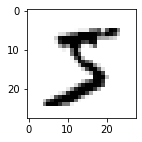

In [7]:
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #圖片大小
    plt.imshow(image, cmap="binary") #圖片黑白顯示
    plt.show()
    
show_image(train_feature[0])

In [8]:
# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字

# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])

(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

In [9]:
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#顯示第1筆的image正規化
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# One-Hot Encoding

import numpy as np
from keras.utils import np_utils
np.random.seed(10)

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [26]:
#建立模型
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#輸入層784 隱藏層256 輸出層10
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))
#定義訓練方式
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#以(train_feature_normalize, train_label_onehot)資料訓練
#訊息資料保留 20% 做驗證，訓練10次，每批次讀取200筆資料，顯示簡易訓練過程
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)


#預測
#prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
#show_images_labels_predictions(test_feature,test_label,prediction,0)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4396 - accuracy: 0.8821 - val_loss: 0.2164 - val_accuracy: 0.9417
Epoch 2/10
 - 1s - loss: 0.1915 - accuracy: 0.9454 - val_loss: 0.1569 - val_accuracy: 0.9556
Epoch 3/10
 - 1s - loss: 0.1367 - accuracy: 0.9606 - val_loss: 0.1279 - val_accuracy: 0.9628
Epoch 4/10
 - 1s - loss: 0.1040 - accuracy: 0.9706 - val_loss: 0.1133 - val_accuracy: 0.9670
Epoch 5/10
 - 1s - loss: 0.0827 - accuracy: 0.9767 - val_loss: 0.0989 - val_accuracy: 0.9709
Epoch 6/10
 - 1s - loss: 0.0678 - accuracy: 0.9808 - val_loss: 0.0993 - val_accuracy: 0.9700
Epoch 7/10
 - 1s - loss: 0.0558 - accuracy: 0.9848 - val_loss: 0.0905 - val_accuracy: 0.9742
Epoch 8/10
 - 1s - loss: 0.0467 - accuracy: 0.9872 - val_loss: 0.0851 - val_accuracy: 0.9758
Epoch 9/10
 - 1s - loss: 0.0392 - accuracy: 0.9894 - val_loss: 0.0847 - val_accuracy: 0.9753
Epoch 10/10
 - 1s - loss: 0.0322 - accuracy: 0.9919 - val_loss: 0.0805 - val_accuracy: 0.9772


In [27]:
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("\n準確率:", scores[1])

10000/10000 [==============================] - 0s 22us/step

準確率: 0.9771000146865845


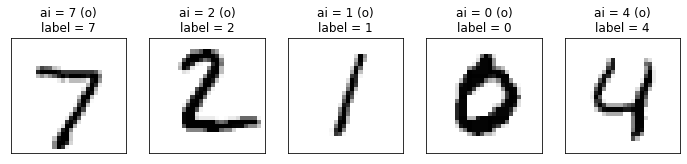

In [29]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import load_model

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#將 Features 特徵值換為 784個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0,5)